In [418]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
dataset=pd.read_csv(r'C:\Users\Yongrui\Downloads/PLACES__Local_Data_for_Better_Health__County_Data_2021_release.csv', usecols=["StateDesc","LocationName","Data_Value","TotalPopulation","LocationID","MeasureId","DataValueTypeID","Geolocation"])
#only keep "AgeAdjPrv",drop Crude prevalence
dataset=dataset[dataset["DataValueTypeID"]=="AgeAdjPrv"]
dataset=dataset.drop(["DataValueTypeID"], axis=1)
#remove rows with LocationID=59,missing corcoordinate
dataset = dataset.loc[dataset.LocationID != 59]
data2=[]
#the dataset is big, took 5-10 minutes to do the 1NF
location=set(dataset['LocationID'])
disease=set(dataset['MeasureId'])
for i in location:
    data3=[]
    for j in disease:
        a=dataset[(dataset.LocationID==i)&(dataset.MeasureId==j)].Data_Value
        if(len(a)==0):
            data3.append("NA")
            continue
        data3.append(np.array(a)[0])
    data2.append(data3)
datasetx=pd.DataFrame(data2,columns=disease)
#split Geolocation to lot lon
loc=[]
for i in location:
    row=np.array(dataset[(dataset.LocationID==i)])[0,(0,1,3,4)]
    a=np.array(dataset[(dataset.LocationID==i)].Geolocation)[0]
    row=np.append(row,[a.replace("(","").replace(")","").split()[2],a.replace("(","").replace(")","").split()[1]])
    loc.append(row)
table=pd.DataFrame(loc,columns=["State","City","Population","LocationID","lat","lon"])
table2 = pd.concat([table, datasetx], axis=1)
# NA remove
for i in range(6,35):
    table2=table2[table2.iloc[:,i]!='NA']
table2=table2.reset_index()

In [358]:
dataset

,StateAbbr,LocationName,Data_Value,TotalPopulation,LocationID,MeasureId,Geolocation
7,GA,Evans,38.7,10654,13109,OBESITY,POINT (-81.88649243 32.15671598)
16,ID,Bonneville,22.8,119062,16019,ARTHRITIS,POINT (-111.6148389 43.38779682)
22,IL,Hardin,24.0,3821,17069,DEPRESSION,POINT (-88.26669442 37.51808974)
34,IN,Rush,24.7,16581,18139,ARTHRITIS,POINT (-85.46569307 39.62000981)
37,IA,Buchanan,37.2,21175,19019,OBESITY,POINT (-91.83755723 42.47108587)
...,...,...,...,...,...,...,...
187645,WV,Boone,40.3,21457,54005,BPHIGH,POINT (-81.71115651 38.02244074)
187646,WI,St. Croix,25.6,90687,55109,BINGE,POINT (-92.45286705 45.03325323)
187649,WV,Wayne,39.6,39402,54099,OBESITY,POINT (-82.4268812 38.14645635)
187651,WA,Pierce,49.6,904980,53053,BPMED,POINT (-122.111739 47.02666169)


In [249]:
datasetxx

,TEETHLOST,DEPRESSION,ARTHRITIS,ACCESS2,CASTHMA,BPMED,COPD,OBESITY,CHECKUP,PHLTH,...,DENTAL,BINGE,COLON_SCREEN,STROKE,MAMMOUSE,SLEEP,COREW,BPHIGH,KIDNEY,CERVICAL
0,-0.216356,1.161817,0.032889,-0.566452,0.801294,-1.755242,-0.548173,-1.396337,-1.084748,-0.245886,...,0.166309,0.802946,-0.023213,-0.412129,-0.330717,-0.504558,-0.177855,-0.700184,-0.295270,0.795608
1,-1.201368,0.815552,-0.522265,-0.902784,0.595979,-1.678386,-1.201916,-1.793919,-0.958298,-1.002552,...,1.354461,0.383484,0.838506,-0.843759,0.314667,-1.284898,-0.264560,-1.419429,-0.724391,1.212051
2,-1.122567,0.815552,-0.756015,-0.712683,-0.225281,-2.216380,-1.528788,-1.723758,-1.236488,-1.267385,...,1.328057,0.738413,1.574120,-1.131512,0.488424,-1.008003,0.342375,-0.885132,-1.153513,1.992881
3,-0.511859,0.930974,-0.346954,-0.478713,0.801294,-1.934574,-0.766087,-1.396337,-1.135328,-0.397219,...,0.377536,0.673881,-0.086266,-0.556006,0.240199,-0.705936,-0.322363,-0.987882,-0.509831,1.107940
4,-0.452759,1.334950,-0.054767,-0.507959,0.801294,-1.908955,-0.602651,-0.390688,-0.907718,-0.321553,...,0.535956,0.835212,0.859524,-0.412129,-0.082492,0.124748,-0.004445,-0.946782,-0.509831,0.795608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,-1.378671,-1.117762,-1.018982,-0.815045,-0.635910,-2.498186,-1.474309,-2.682633,-1.843449,-1.494384,...,0.799990,0.383484,0.376120,-1.419265,-1.100212,-1.561793,0.140063,-1.850976,-1.368073,0.587387
3117,-0.590660,-0.771497,-0.551484,-0.171626,0.082692,-2.037049,-0.766087,-2.168114,-2.146929,-0.586386,...,0.166309,-0.035978,-0.233388,-0.699882,-1.968998,-0.957659,-0.466872,-1.234480,-0.724391,-0.349610
3118,-0.905864,-1.464027,-1.398825,0.179329,-0.738568,-1.832098,-1.419831,-1.770532,-1.944609,-1.002552,...,0.588763,-0.165043,0.102892,-1.131512,-1.720773,-1.209381,-0.380167,-1.378329,-0.724391,-0.453721
3119,-0.531560,-1.175473,-0.756015,0.384053,-0.327938,-1.883336,-0.875044,-2.448761,-2.020479,-0.548552,...,0.285124,-0.294108,-0.800862,-0.699882,-2.788138,-0.957659,-0.726987,-1.337229,-0.509831,-0.661942


In [348]:
table2['lat']=table2['lat'].astype(float)
table2['lon']=table2['lon'].astype(float)
table2['CANCER']=table2['CANCER'].astype(float)
table2['ACCESS2']=table2['ACCESS2'].astype(float)
table2['DIABETES']=table2['DIABETES'].astype(float)
table2['DEPRESSION']=table2['DEPRESSION'].astype(float)

In [345]:
table2

,index,State,City,Population,LocationID,lat,lon,TEETHLOST,DEPRESSION,ARTHRITIS,...,DENTAL,BINGE,COLON_SCREEN,STROKE,MAMMOUSE,SLEEP,COREW,BPHIGH,KIDNEY,CERVICAL
0,0,OR,Baker,16124,41001,44.709220,-117.675521,16.4,25.7,25.2,...,61.3,20.5,61.8,3.1,69.4,34.8,21.8,29.3,2.8,85.4
1,1,OR,Benton,93053,41003,44.491532,-123.429090,11.4,24.5,23.3,...,70.3,19.2,65.9,2.8,72.0,31.7,21.5,25.8,2.6,86.2
2,2,OR,Clackamas,418187,41005,45.187967,-122.220971,11.8,24.5,22.5,...,70.1,20.3,69.4,2.6,72.7,32.8,23.6,28.4,2.4,87.7
3,3,OR,Clatsop,40224,41007,45.995533,-123.654882,14.9,24.9,23.9,...,62.9,20.1,61.5,3.0,71.7,34.0,21.3,27.9,2.7,86.0
4,4,OR,Columbia,52354,41009,45.943641,-123.088030,15.2,26.3,24.9,...,64.1,20.6,66.0,3.1,70.4,37.3,22.4,28.1,2.7,85.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,3137,CO,Teller,25388,8119,38.882280,-105.161704,10.5,17.8,21.6,...,66.1,19.2,63.7,2.4,66.3,30.6,22.9,23.7,2.3,85.0
3117,3138,CO,Washington,4908,8121,39.971130,-103.201414,14.5,19.0,23.2,...,61.3,17.9,60.8,2.9,62.8,33.0,20.8,26.7,2.6,83.2
3118,3139,CO,Weld,324492,8123,40.554936,-104.392827,12.9,16.6,20.3,...,64.5,17.5,62.4,2.6,63.8,32.0,21.1,26.0,2.6,83.0
3119,3140,CO,Yuma,10019,8125,40.002845,-102.424610,14.8,17.6,22.5,...,62.2,17.1,58.1,2.9,59.5,33.0,19.9,26.2,2.7,82.6


In [327]:
disease

{'ACCESS2',
 'ARTHRITIS',
 'BINGE',
 'BPHIGH',
 'BPMED',
 'CANCER',
 'CASTHMA',
 'CERVICAL',
 'CHD',
 'CHECKUP',
 'CHOLSCREEN',
 'COLON_SCREEN',
 'COPD',
 'COREM',
 'COREW',
 'CSMOKING',
 'DENTAL',
 'DEPRESSION',
 'DIABETES',
 'GHLTH',
 'HIGHCHOL',
 'KIDNEY',
 'LPA',
 'MAMMOUSE',
 'MHLTH',
 'OBESITY',
 'PHLTH',
 'SLEEP',
 'STROKE',
 'TEETHLOST'}

Below plot shows the percetage of people get cancer in each city. People in the middle States has higher probablity get cancer. States like California, Taxs, and east coast states have lower chance to get cancer, which in deep color.

In [342]:
import plotly.express as px
fig = px.scatter_mapbox(table2, lat="lat", lon="lon", hover_name="City", hover_data=["City", "Population"],
                        color="CANCER", zoom=3, height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ACCESS is the percentage of people who don't have health insurance. Compared to the Cancer plot, People in the middle States has higher probablity have no insurance. States like California, Taxs, and east coast states have higher inusrance cover rate, which in lighter color.

In [346]:
fig = px.scatter_mapbox(table2, lat="lat", lon="lon", hover_name="City", hover_data=["City", "Population"],
                        color="ACCESS2", zoom=3, height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

The blow plot show how Diabete distribute in the Unite State. We can find that the southren states are more likely to have diabetes. South Dakota is little odd as a northern state who has higher rate of diabetes.

In [350]:
fig = px.scatter_mapbox(table2, lat="lat", lon="lon", hover_name="City", hover_data=["City", "Population"],
                        color="DIABETES", zoom=3, height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

The below plot shows the distribution of depression in the United State. We can see that the north west states and middle states have higher rate of depression.

In [352]:
fig = px.scatter_mapbox(table2, lat="lat", lon="lon", hover_name="City", hover_data=["City", "Population"],
                        color="DEPRESSION", zoom=3, height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [127]:
datasetx=pd.DataFrame(data2,columns=disease)

In [128]:
datasetx

,TEETHLOST,DEPRESSION,ARTHRITIS,ACCESS2,CASTHMA,BPMED,COPD,OBESITY,CHECKUP,PHLTH,...,DENTAL,BINGE,COLON_SCREEN,STROKE,MAMMOUSE,SLEEP,COREW,BPHIGH,KIDNEY,CERVICAL
0,16.4,25.7,25.2,14.5,10.5,50.9,6.4,29.8,69.7,13.1,...,61.3,20.5,61.8,3.1,69.4,34.8,21.8,29.3,2.8,85.4
1,11.4,24.5,23.3,12.2,10.3,51.2,5.2,28.1,70.2,11.1,...,70.3,19.2,65.9,2.8,72.0,31.7,21.5,25.8,2.6,86.2
2,11.8,24.5,22.5,13.5,9.5,49.1,4.6,28.4,69.1,10.4,...,70.1,20.3,69.4,2.6,72.7,32.8,23.6,28.4,2.4,87.7
3,14.9,24.9,23.9,15.1,10.5,50.2,6.0,29.8,69.5,12.7,...,62.9,20.1,61.5,3.0,71.7,34.0,21.3,27.9,2.7,86.0
4,15.2,26.3,24.9,14.9,10.5,50.3,6.3,34.1,70.4,12.9,...,64.1,20.6,66.0,3.1,70.4,37.3,22.4,28.1,2.7,85.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,10.5,17.8,21.6,12.8,9.1,48.0,4.7,24.3,66.7,9.8,...,66.1,19.2,63.7,2.4,66.3,30.6,22.9,23.7,2.3,85.0
3138,14.5,19.0,23.2,17.2,9.8,49.8,6.0,26.5,65.5,12.2,...,61.3,17.9,60.8,2.9,62.8,33.0,20.8,26.7,2.6,83.2
3139,12.9,16.6,20.3,19.6,9.0,50.6,4.8,28.2,66.3,11.1,...,64.5,17.5,62.4,2.6,63.8,32.0,21.1,26.0,2.6,83.0
3140,14.8,17.6,22.5,21.0,9.4,50.4,5.8,25.3,66.0,12.3,...,62.2,17.1,58.1,2.9,59.5,33.0,19.9,26.2,2.7,82.6


corrolation matrax is a common way to find hint of relactionshpe between variables. When it more approach -1 means negative correlation,vice versa. In the below plot, the brighter means more positive correlated.We can find some interesting thing such like the relaction between depression and dental. Why a person go to dental more offen, it less likely have depression?? 

<AxesSubplot:>

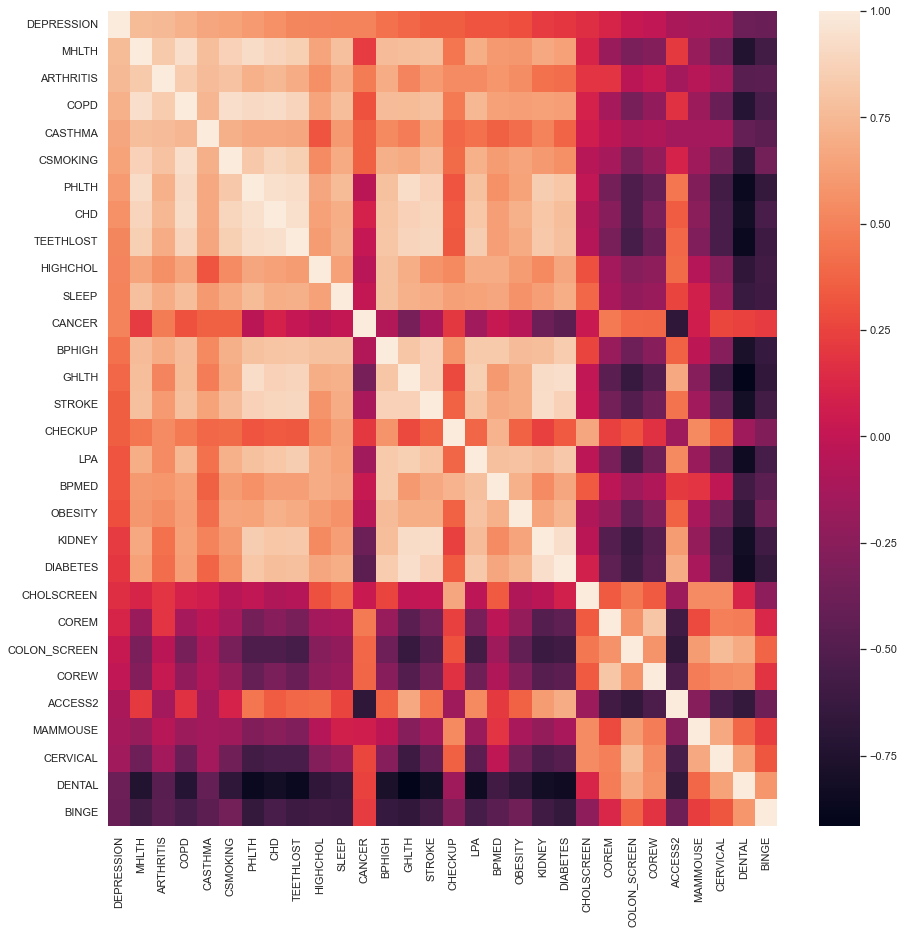

In [416]:
import seaborn as sns
cormat = datasetxx.astype(float).corr()
ix = cormat.sort_values('DEPRESSION', ascending=False).index
df_sorted = cormat.loc[:,ix]
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(cormat.loc[ix,ix])

Question 2：

In [395]:
#get the percetage of people dont have insurance in each state,use "ACCESS2" variable
state=set(table2.State)
stt=[]
for i in state:
    tb=table2[table2.State==i]
    stt.append([i,round(sum(tb.Population*tb.ACCESS2)/sum(tb.Population),4)])
stt=pd.DataFrame(stt,columns=['State','percent'])
stt

,State,percent
0,Florida,26.7886
1,Arizona,21.0930
2,South Dakota,14.0894
3,California,17.7424
4,New Mexico,18.1247
5,New Hampshire,12.2835
6,Delaware,16.0646
7,Nevada,21.5277
8,Pennsylvania,12.6305
9,Alaska,14.0051


In [379]:
#download from https://worldpopulationreview.com/state-rankings/per-capita-income-by-state, attached in file
stateincome=pd.read_csv(r'C:\Users\Yongrui\Downloads/csvData.csv', usecols=["State","PerCapitaIncome"])

In [380]:
stateincome

,State,PerCapitaIncome
0,New Jersey,42745
1,Connecticut,44496
2,Massachusetts,43761
3,Maryland,42122
4,California,36955
5,Hawaii,35567
6,New York,39326
7,Virginia,39278
8,New Hampshire,40003
9,Washington,38915


In [396]:
stt=pd.merge(stt, stateincome, on="State")
stt=stt.sort_values(by=['percent'])
stt

,State,percent,PerCapitaIncome
34,Vermont,10.0627,34577
33,Massachusetts,10.4728,43761
35,North Dakota,10.9535,36062
37,Iowa,11.4069,32176
31,Kentucky,11.5107,28178
42,Minnesota,11.7194,37625
25,Hawaii,11.8841,35567
5,New Hampshire,12.2835,40003
17,Rhode Island,12.2947,36121
45,Maryland,12.6156,42122


The below plot shows the negitive relationshape between income and nun health insurance cover rate. The blue line is the percentage of people who dont have insurance, the yellow line is the average income of a state divide by 1500.

<function matplotlib.pyplot.show(close=None, block=None)>

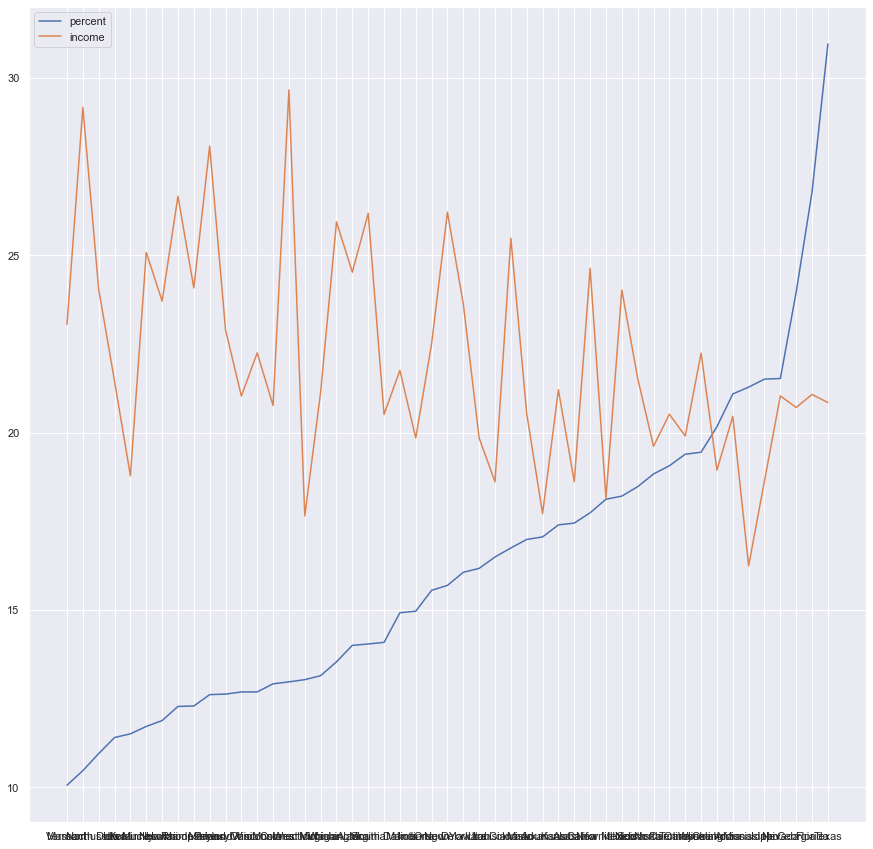

In [413]:
plt.plot(np.array(stt.State),np.array(stt.percent),label = "percent")
plt.plot(np.array(stt.State),np.array(stt.PerCapitaIncome/1500),label = "income")
plt.legend()
plt.show